# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('../data/application_train.csv')
df.head()

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [ ]:
#1
cut_rule = [-np.inf, 0, 2, 5, np.inf]

df['CNT_CHILDREN_GROUP'] = pd.cut(df['CNT_CHILDREN'].values, cut_rule, include_lowest= True)
df['CNT_CHILDREN_GROUP'].value_counts()


In [31]:
#2-1
grp = ['CNT_CHILDREN_GROUP', 'TARGET'] 

grouped_df = df.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-0.001, 1.0]       0         168554.452269
                    1         166133.317001
(1.0, 3.0]          0         173824.963059
                    1         161627.570234
(3.0, 5.0]          0         174103.702882
                    1         150851.612903
(5.0, 100.0]        0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

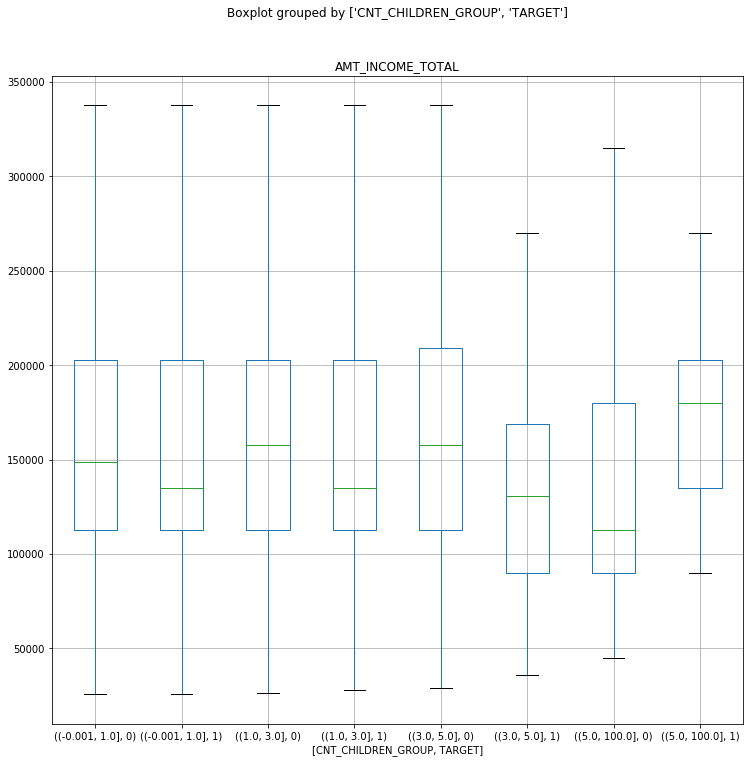

In [37]:
#2-2

plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET' ]

df.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.show()

In [39]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

df['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())

df[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.045954
1,270000.0,0.962147
2,67500.0,-0.958437
3,135000.0,-0.318243
4,121500.0,-0.446282
